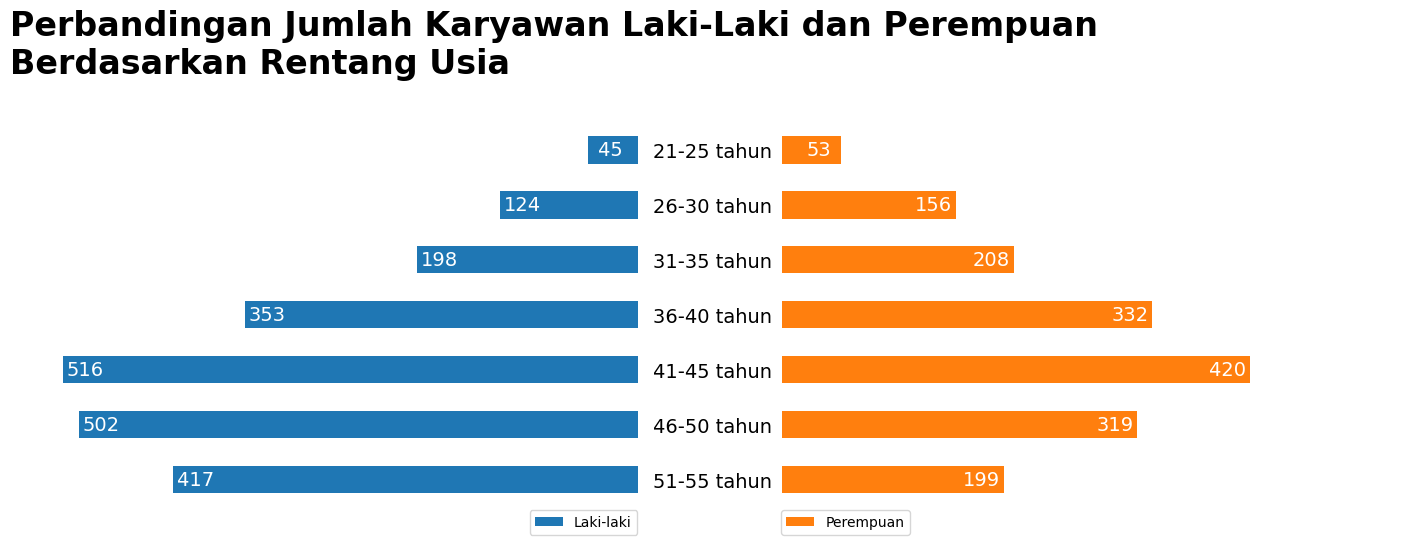

In [128]:
# Membuat Tabel Batang Horizontal
import pandas as pd
import matplotlib.pyplot as plt
data = (pd.read_csv("https://storage.googleapis.com/dqlab-dataset/usia_karyawan.csv").sort_values("Kelompok Usia",ascending=False).
        set_index("Kelompok Usia"))
data["Laki-laki"] = -data["Laki-laki"]
fig,ax = plt.subplots(1,2,figsize=(14,6))
fig.suptitle("Perbandingan Jumlah Karyawan Laki-Laki dan Perempuan\nBerdasarkan Rentang Usia",
             fontweight="bold",x=0.,y=0.9,fontsize=24,ha='left')
data["Perempuan"].plot(kind='barh',ax=ax[1],fontsize=14,color="tab:orange",xlim=[0,550])
data["Laki-laki"].plot(kind='barh',ax=ax[0],color="tab:blue",xlim=[-550,0])
ax[0].set_ylabel("")
ax[0].tick_params(left=False,bottom=False,labelleft=False,labelbottom=False)
ax[0].legend(["Laki-laki"],fontsize=10,bbox_to_anchor=(0.,0.,1.01,0.01))
ax[0].set_frame_on(False)
ax[1].tick_params(left=False,bottom=False,labelbottom=False)
ax[1].set_ylabel("")
ax[1].set_frame_on(False)
ax[1].legend(["Perempuan"],fontsize=10,bbox_to_anchor=(0.,0.,0.22,0.01))
for i,k,j in zip(range(data.shape[0]),list(data["Laki-laki"]),list(data["Perempuan"])) :
    ax[0].annotate(str(abs(k)),(k+20,i),xytext=(k+20,i),
                     color="w",va="center",ha="center",fontsize=14)
    ax[1].annotate(str(abs(j)),(j-20,i),xytext=(j-20,i),
                     color="w",va="center",ha="center",fontsize=14) 
plt.tight_layout(rect=(0,0,1,0.88))
plt.show()

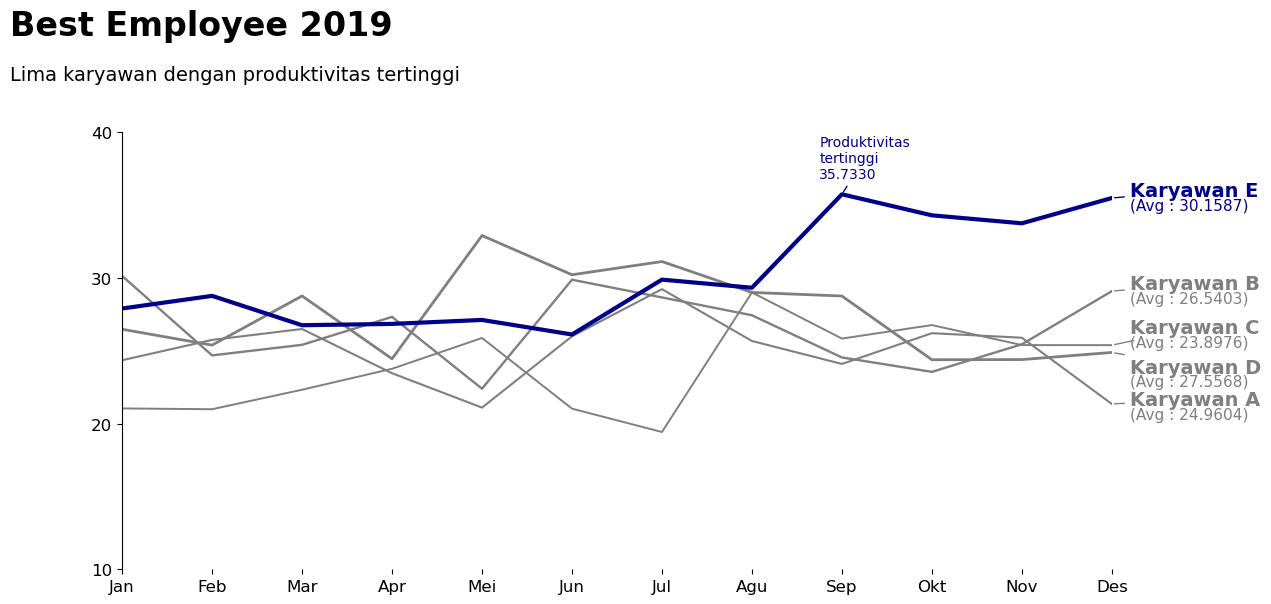

In [35]:
# Membuat Grafik Garis (Line Chart)
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/produktivitas_karyawan.csv",index_col="Bulan")/1000
fig, ax = plt.subplots(1,1,figsize=(12,6))
plt.suptitle("Best Employee 2019",weight="bold",ha="left",x=-0.055,y=1,fontsize=24)
ax.set_title("Lima karyawan dengan produktivitas tertinggi",ha="right",x=0.3414,y=1.1,fontsize=14)
colors = ["tab:gray","tab:gray","tab:gray","tab:gray","darkblue"]
line_width = [1.5,1.7,1.4,2,3]
lp = data.plot(kind="line",ax=ax,xlim=[0,11],ylim=[10,40],color=colors,xticks=range(data.shape[0]),yticks=[10,20,30,40])

add_lbl_pos = [0.3, 0.5, 1.2, -1.0, 0.5]
add_avg_pos = [-0.7, -0.5, 0.2, -2.0, -0.5]
for i, item in enumerate(lp.get_lines()) :
    item.set_linewidth(line_width[i])
    lbl = item.get_label()
    ax.annotate(lbl, (11, data.loc["Desember", lbl]), (11.2, data.loc["Desember", lbl] + add_lbl_pos[i]),
               fontweight="bold",fontsize=14,va="center",color=colors[i],arrowprops={"arrowstyle":"-", "color":colors[i]})
    ax.annotate("(Avg : %.4f)" % data[lbl].mean(),(11,data.loc["Desember",lbl]), (11.2, data.loc["Desember",lbl]+add_avg_pos[i]),
               fontsize=11,color=colors[i],va="center")

highest_prod = data["Karyawan E"].max()
ax.annotate("Produktivitas\ntertinggi\n%.4f"%highest_prod, (8,highest_prod), (7.75,highest_prod+2.5),
           va="center",ha="left",color=colors[-1],arrowprops={"arrowstyle":"-","color":colors[-1]})
ax.set_xticklabels([i[:3] for i in data.index],fontsize=12)
ax.set_yticklabels([str(i) for i in [10,20,30,40]], fontsize=12)
ax.set_xlabel("")
plt.tight_layout(rect=(0,0,1,0.90))
ax.get_legend().remove()
ax.spines["top"].set_color("none")
ax.spines["bottom"].set_color("none")
ax.spines["right"].set_color("none")

plt.tight_layout()
plt.show()

sumber belajar : www.dqlab.id